# Анализ фондового рынка. 

In [ ]:
!pip uninstall jupyter

In [1]:
!pip install jupyter

<b>Описание проекта</b><br>
Из импортированных файлов  с информацией о динамике цен акций на фондовом рынке необходимо собрать датафрейм, осуществить предобработку, добавить метрики и провести исследовательский анализ цены за последние 3 года. В исследовании использовать скользящие средние, экспотенциальные скользящие средние и RSI индикатор.



**Задание**
1. Загрузите информацию об акциях (не менее пяти тикеров) с сайте finam.ru с параметрами:
Интервал: 3 года, периодичность 1 день.
Формат записи в файл:
<TICKER>	<PER>	<DATE>	<TIME>	<OPEN>	<HIGH>	<LOW>	<CLOSE>	<VOL>
https://www.finam.ru/quote/moex/gazp/export/
2. Соберите информацию из файлов в единый датафрейм (используйте дополнительные библиотеки).
3. Осуществите предобработку дат и заголовков.
4. Постройте линейные графики динамики цены для каждой акции (реализуйте в цикле).
5. Для каждой акции найдите дни максимального изменения цены (взлета и падения). Составьте отчет.
6. Найдите скользящие средние (периоды 10, 50, 100) для каждой акции. Добавьте на график.
7. Постройте в цикле графики объема (volume) для каждого тикера.
8. Реализуйте в цикле для каждого тикера последовательно: график цены вместе с скользящими средними с периодом 50, 100 и график объема, реализуйте с помощью функции. На вход функция принимает два параметра: тикер и год.
9. Добавьте экспоненциальные скользящие средние для каждого тикера с периодом 50.
10. Осуществите расчет индикатора RSI.
11.  Создайте функцию для вывода графиков: цены, скользящей средней (тип и период определите самостоятельно) и отдельный график для RSI индикатора. На графике с RSI добавьте две красные линии на уровнях 70 и 30. На вход функция принимает два параметра: тикер и год. <br>

Работу сопроводите комментариями к коду и выводами. 

**Дополнительная задача**<br>
Постройте модель прогноза цены акции

**Дополнительная информация**
1. Экпорт файлов осуществите с сайта:
https://www.finam.ru/quote/moex/gazp/export/
2. Для получения файлов из заданной директории используйте:

import glob<br>
globbed_files = glob.glob(path) # список файлов<br>

3. Информация про индикатор RSI
на БКС Экспресс:<br>
https://bcs-express.ru/novosti-i-analitika/indeks-otnositel-noi-sily-rsi-relative-strength-index<br>
Почитать еще про RSI:<br>
https://ru.tradingview.com/chart/BTCUSD/Eq8tysZA-indikator-rsi-sekrety-torgovli-pravila-primeneniya-polnyj-razbor/

3. Допустима загрузка исторических данных с помощью tinkoff invest api вместо экспорта с finam.ru

**Дополнительная задача**<br>
Постройте модель прогноза цены акции

vol = количество заключенных сделок по данному финансовому инструменту в единицу времени
last = цена последней сделки. Ценой ласт называется последняя цена, по которой была совершена сделка по конкретному инструменту


#### Певрая часть задания:загрузите информацию об акциях (не менее пяти тикеров) с сайте finam.ru с параметрами: Интервал: 3 года, периодичность 1 день. Формат записи в файл: https://www.finam.ru/quote/moex/gazp/export/, соберите информацию из файлов в единый датафрейм (используйте дополнительные библиотеки), осуществите предобработку дат и заголовков, постройте линейные графики динамики цены для каждой акции (реализуйте в цикле).

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

ImportError: DLL load failed while importing _path: Не найден указанный модуль.

In [ ]:

!pip uninstall numpy 

In [ ]:
!pip uninstall matplotlib

In [ ]:
pip uninstall numpy
pip uninstall matplotlib

In [8]:
files = glob.glob('*.csv')
files

['ALRS_07122020_07122023 (1).csv',
 'LKOH_07122020_07122023 (1).csv',
 'SBER_07122020_07122023 (1).csv',
 'SIBN_07122020_07122023.csv',
 'VTBR_07122020_07122023.csv']

In [9]:
df = pd.DataFrame()
columns_names = ['tiker','per','date','time','open','high','low','close','volume']
for file in files:
    data = pd.read_csv(file,sep=';',names = columns_names)
    data['name'] = file
    df = pd.concat([df, data],ignore_index=True)
df

,tiker,per,date,time,open,high,low,close,volume,name
0,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>,ALRS_07122020_07122023 (1).csv
1,ALRS,D,201207,00:00:00,91.4500000,93.5000000,90.9100000,91.9300000,25422340,ALRS_07122020_07122023 (1).csv
2,ALRS,D,201208,00:00:00,92.0200000,94.4900000,91.4400000,92.9500000,23330050,ALRS_07122020_07122023 (1).csv
3,ALRS,D,201209,00:00:00,93.1700000,93.9000000,91.4100000,91.6500000,13760650,ALRS_07122020_07122023 (1).csv
4,ALRS,D,201210,00:00:00,91.7400000,93.3300000,90.6900000,92.2100000,23786910,ALRS_07122020_07122023 (1).csv
...,...,...,...,...,...,...,...,...,...,...
3723,VTBR,D,231201,00:00:00,0.0238700,0.0241250,0.0235200,0.0236100,60649830000,VTBR_07122020_07122023.csv
3724,VTBR,D,231204,00:00:00,0.0235900,0.0235900,0.0224700,0.0225450,110411120000,VTBR_07122020_07122023.csv
3725,VTBR,D,231205,00:00:00,0.0226600,0.0229000,0.0223300,0.0228850,97954880000,VTBR_07122020_07122023.csv
3726,VTBR,D,231206,00:00:00,0.0228800,0.0229650,0.0219450,0.0220700,128677490000,VTBR_07122020_07122023.csv


In [10]:
df = df[df['date'] != '<DATE>'] #удаляем столбцы

In [11]:
df['date'] = '20' + df['date']

C:\Users\Админ\AppData\Local\Temp\ipykernel_10804\3732122683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = '20' + df['date']


In [12]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d') #задаем формат даты

C:\Users\Админ\AppData\Local\Temp\ipykernel_10804\3324267867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'],format='%Y%m%d') #задаем формат даты


In [13]:
df['open'] = df['open'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float) #меняем формат столбцов

C:\Users\Админ\AppData\Local\Temp\ipykernel_10804\2840657322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open'] = df['open'].astype(float)
C:\Users\Админ\AppData\Local\Temp\ipykernel_10804\2840657322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close'] = df['close'].astype(float)
C:\Users\Админ\AppData\Local\Temp\ipykernel_10804\2840657322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [14]:
for i in df['tiker'].unique():
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df[df['tiker'] == i], x='date',y='open',color = "#7BC7ED").set(title=f'Динамика стоимости акции {i}', xlabel='Дата', ylabel = 'Стоимость')
    plt.show() #изображаем динамику цены открытия

NameError: name 'plt' is not defined

In [15]:
for i in df['tiker'].unique():
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df[df['tiker'] == i], x='date',y='close',color = "#7BC7ED").set(title=f'Динамика стоимости акции {i}', xlabel='Дата', ylabel = 'Стоимость')
    plt.show() #изображаем динамику цены закрытия

NameError: name 'plt' is not defined

### 5. Для каждой акции найдите дни максимального изменения цены (взлета и падения). Составьте отчет.

In [10]:
df['diff'] = df['close'] - df['open']  #считаем изменение цены

C:\Users\Админ\AppData\Local\Temp\ipykernel_10412\1936351532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['close'] - df['open']  #считаем изменение цены


In [11]:
df_new = pd.DataFrame({'tiker':[],'date_max':[],'max':[],'date_min':[],'min':[]})

In [12]:
#составляем таблицу, в которой содержится информация о днях взлета и падения цен
for i in df['tiker'].unique():
    max_n2 = df[df['tiker'] == i]['diff'].max()
    min_n2 = df[df['tiker'] == i]['diff'].min()
    date_max = df[(df['tiker'] == i)&(df['diff'] == max_n2)]['date'].mean()
    date_min = df[(df['tiker'] == i)&(df['diff'] == min_n2)]['date'].mean()
    df_new.loc[len(df_new.index)] = [i, date_max, max_n2, date_min, min_n2]
df_new 

,tiker,date_max,max,date_min,min
0,ALRS,2022-02-22,9.2000,2022-02-24,-12.96000
1,LKOH,2022-03-31,568.0000,2022-02-24,-750.00000
2,SBER,2021-11-23,20.5600,2022-02-24,-54.40000
3,SIBN,2023-11-09,42.7500,2022-02-24,-82.10000
4,VTBR,2021-04-23,0.0032,2022-02-24,-0.01041


In [13]:
df_new_module = pd.DataFrame({'tiker':[],'date_max':[],'max_module':[],'date_min':[],'min_module':[]})

In [14]:
for i in df['tiker'].unique():
    max_n = df[df['tiker'] == i]['diff'].abs().max()
    min_n = df[df['tiker'] == i]['diff'].abs().min()
    date_max = df[(df['tiker'] == i)&(df['diff'].abs() == max_n)]['date'].mean()
    date_min = 'не одно значение даты'
    df_new_module.loc[len(df_new_module.index)] = [i, date_max, max_n, date_min, min_n]
df_new_module

,tiker,date_max,max_module,date_min,min_module
0,ALRS,2022-02-24,12.96000,не одно значение даты,0.0
1,LKOH,2022-02-24,750.00000,не одно значение даты,0.0
2,SBER,2022-02-24,54.40000,не одно значение даты,0.0
3,SIBN,2022-02-24,82.10000,не одно значение даты,0.0
4,VTBR,2022-02-24,0.01041,не одно значение даты,0.0


### 6. Найдите скользящие средние (периоды 10, 50, 100) для каждой акции. Добавьте на график.

10-ти дневная скользящая средняя

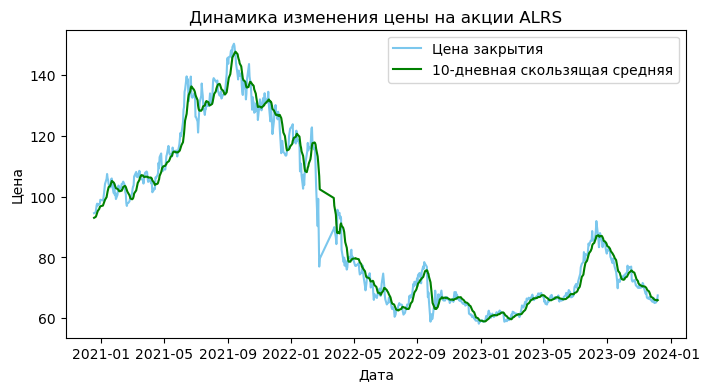

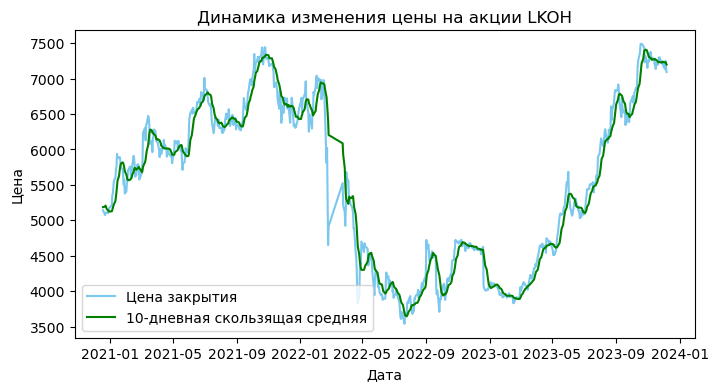

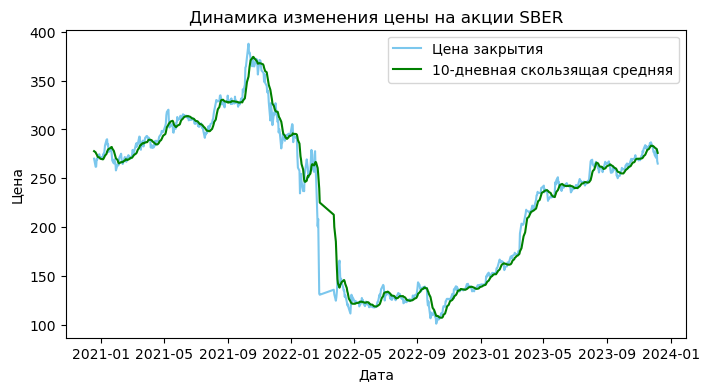

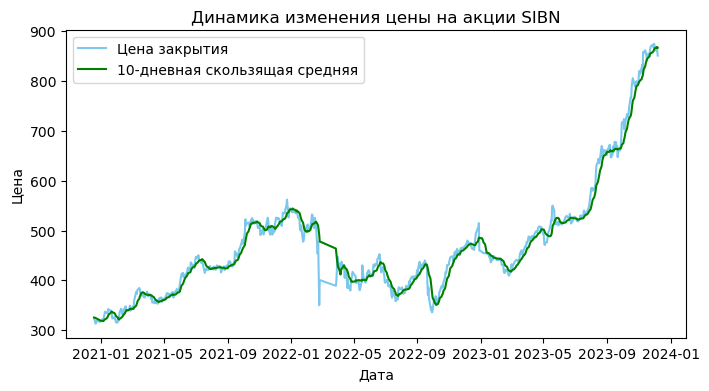

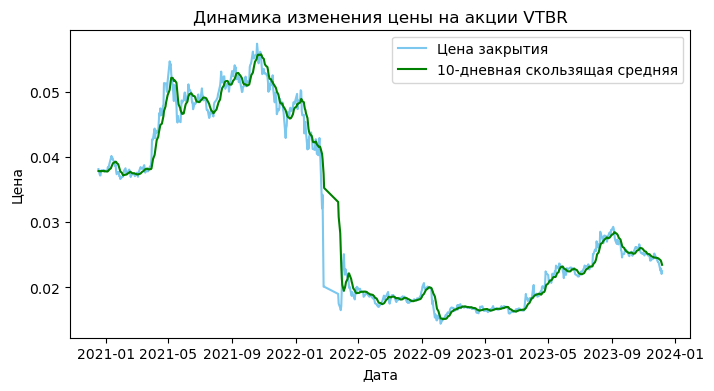

In [15]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new["moving_average"] = df_new["close"].rolling(window=10).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED", label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average',color = "green", label="10-дневная скользящая средняя")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

50-ти дневная скользящая средняя

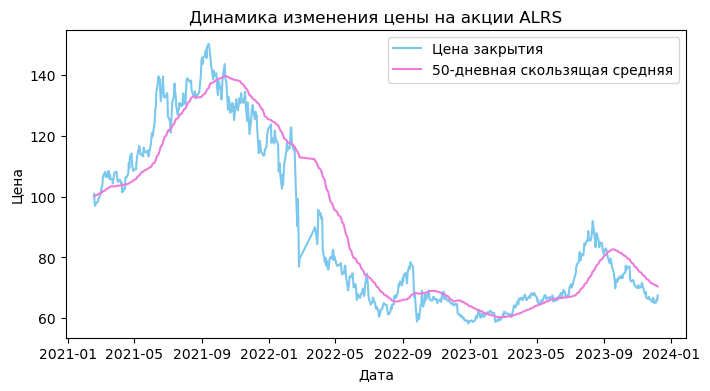

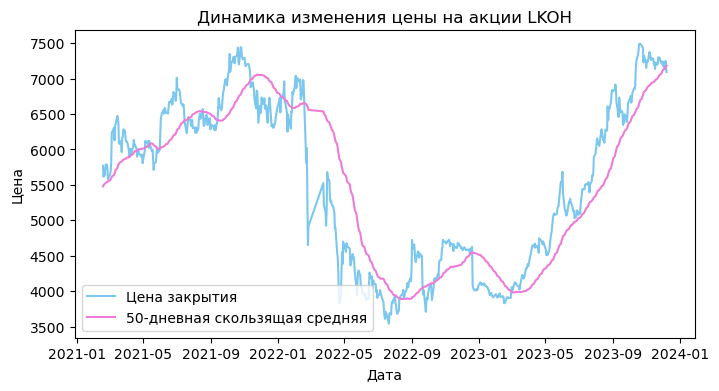

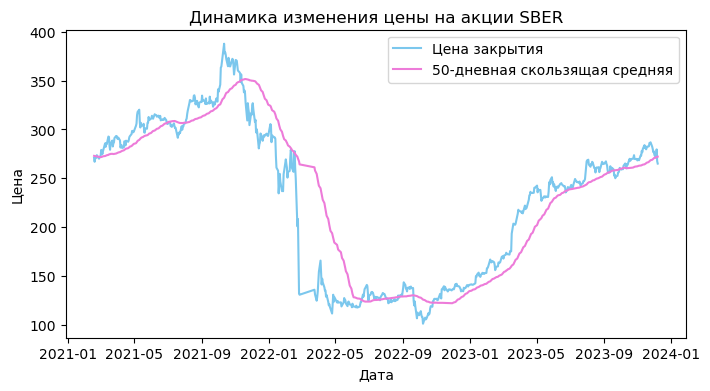

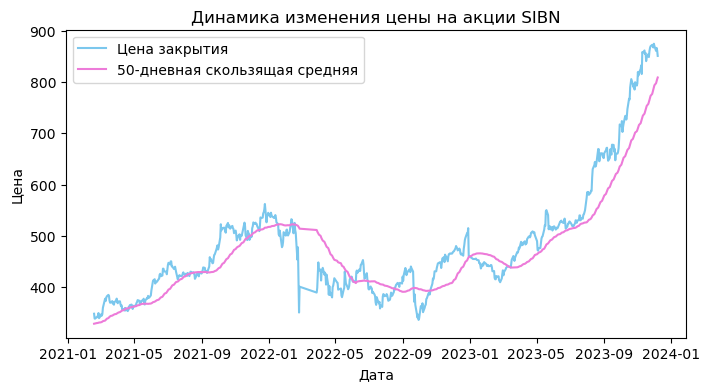

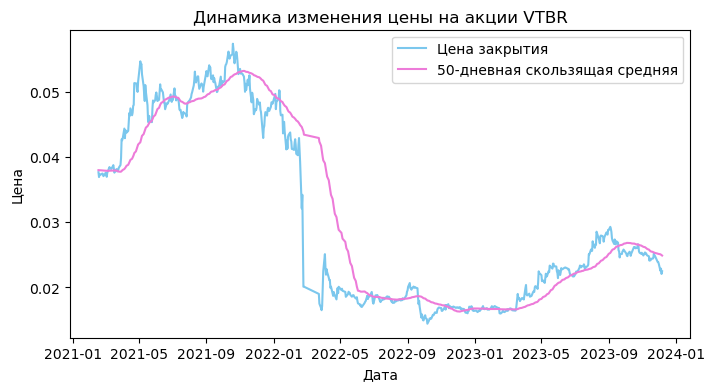

In [16]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new["moving_average"] = df_new["close"].rolling(window=50).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average',color = "#ED7BD9",label="50-дневная скользящая средняя")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

100-ти дневная скользящая средняя

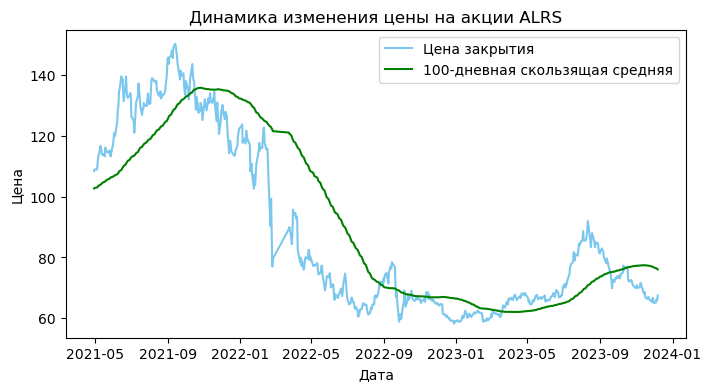

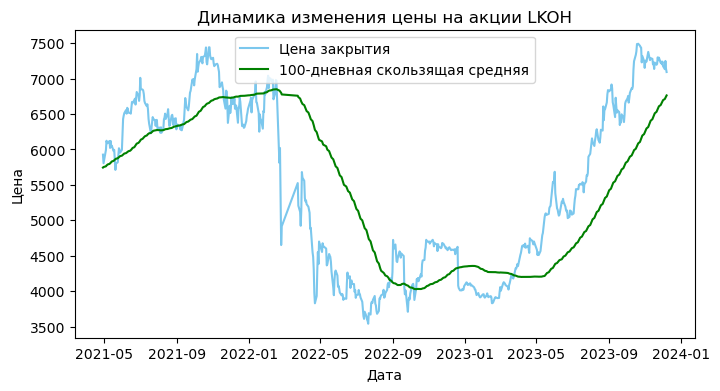

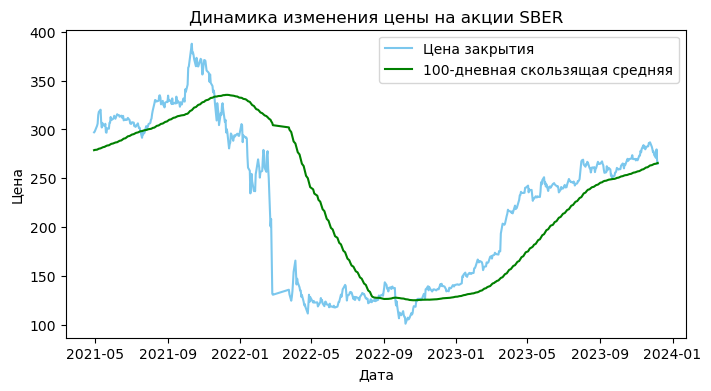

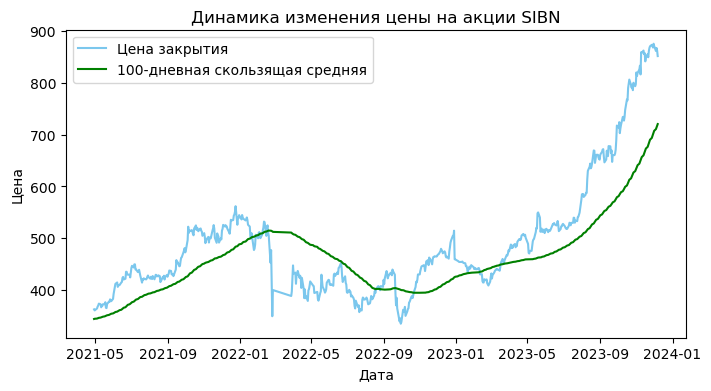

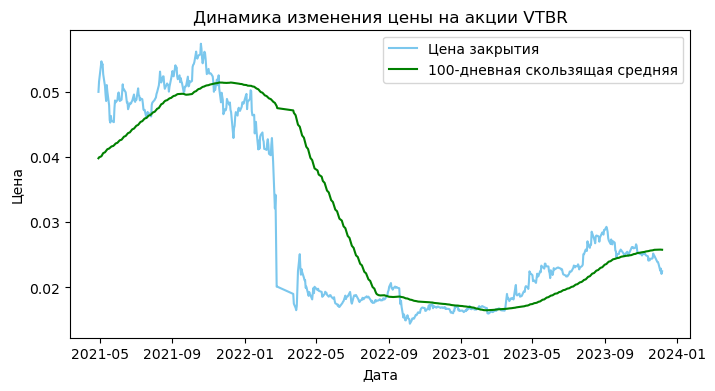

In [17]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new["moving_average"] = df_new["close"].rolling(window=100).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average',color = "green",label="100-дневная скользящая средняя")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

ДРУГОЙ СПОСОБ

In [18]:
#10-ти дневная скользящая средняя
list_sr_10= []

for i in df['tiker'].unique():
    x = df[df['tiker'] == i]['open'].tolist()
    def moving_avg(x, n):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
    n = 10
    list_sr_10.append(moving_avg(x, n))

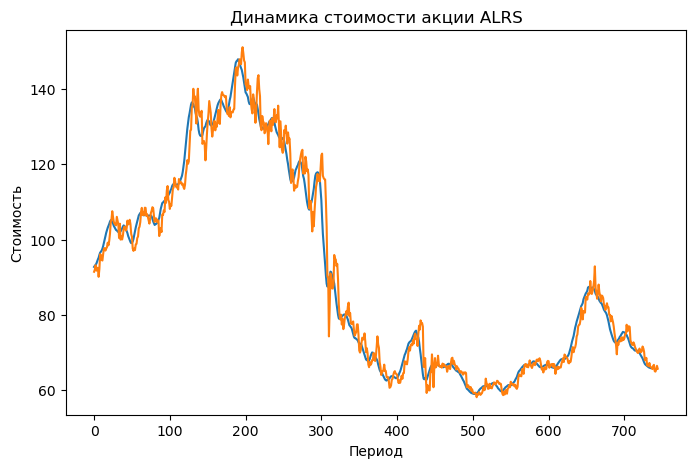

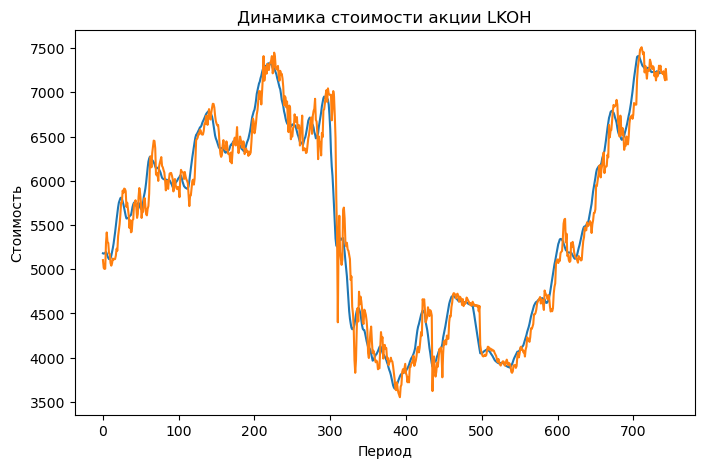

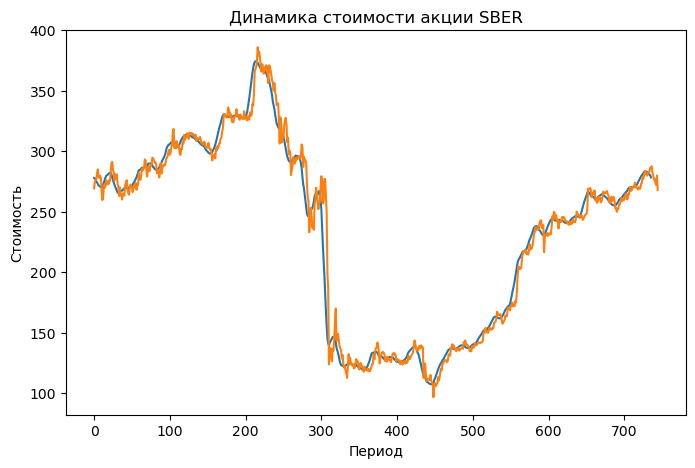

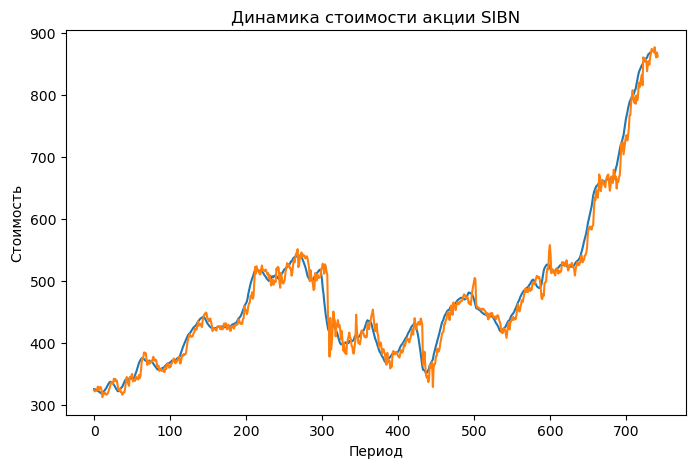

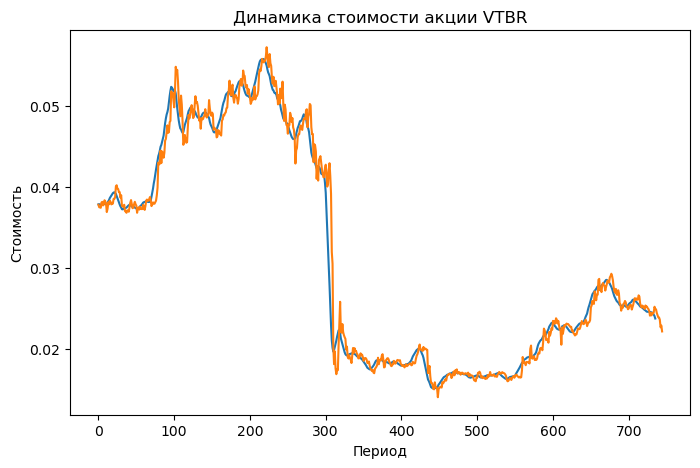

In [19]:
for i in range(len(df['tiker'].unique())):
    plt.figure(figsize=(8, 5))
    plt.plot(list_sr_10[i])
    plt.plot(df[df['tiker'] == (df['tiker'].unique()[i])]['open'].tolist())
    plt.title (f"Динамика стоимости акции {df['tiker'].unique()[i]}")
    plt.xlabel('Период')
    plt.ylabel('Стоимость')

In [20]:
#50-ти дневная скользящая средняя
list_sr_50= []

for i in df['tiker'].unique():
    x = df[df['tiker'] == i]['open'].tolist()
    def moving_avg(x, n):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
    n = 50
    list_sr_50.append(moving_avg(x, n))

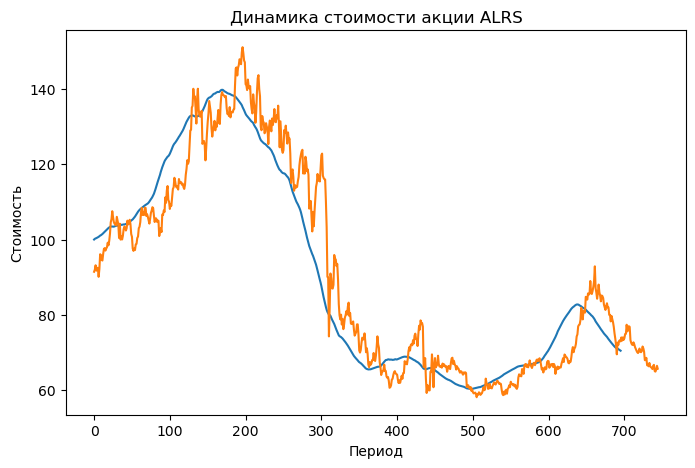

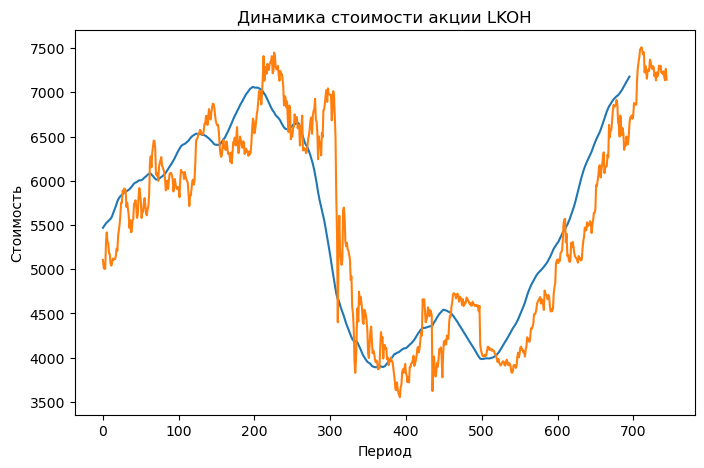

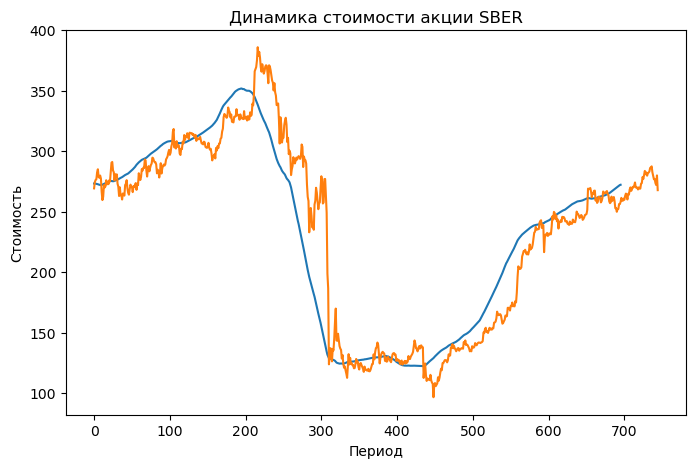

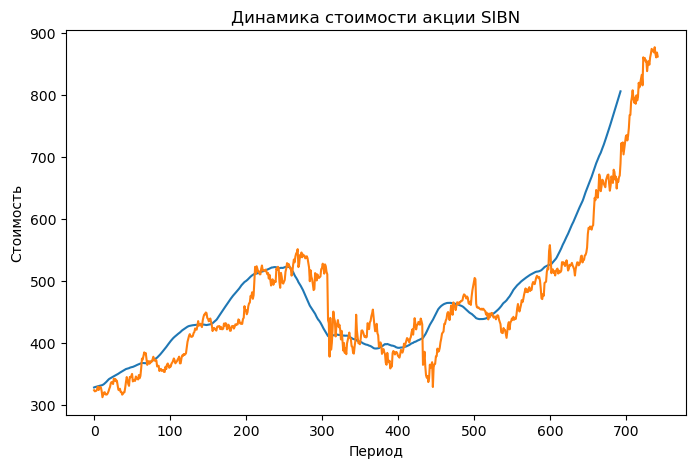

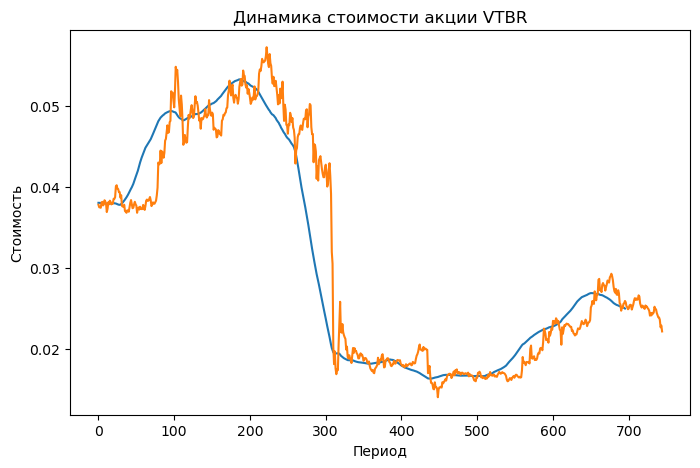

In [21]:
for i in range(len(df['tiker'].unique())):
    plt.figure(figsize=(8, 5))
    plt.plot(list_sr_50[i])
    plt.plot(df[df['tiker'] == (df['tiker'].unique()[i])]['open'].tolist())
    plt.title (f"Динамика стоимости акции {df['tiker'].unique()[i]}")
    plt.xlabel('Период')
    plt.ylabel('Стоимость')

In [22]:
#100- дневная скользящая средняя
list_sr_100 = []

for i in df['tiker'].unique():
    x = df[df['tiker'] == i]['open'].tolist()
    def moving_avg(x, n):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[n:] - cumsum[:-n]) / float(n)
    n = 100
    list_sr_100.append(moving_avg(x, n))


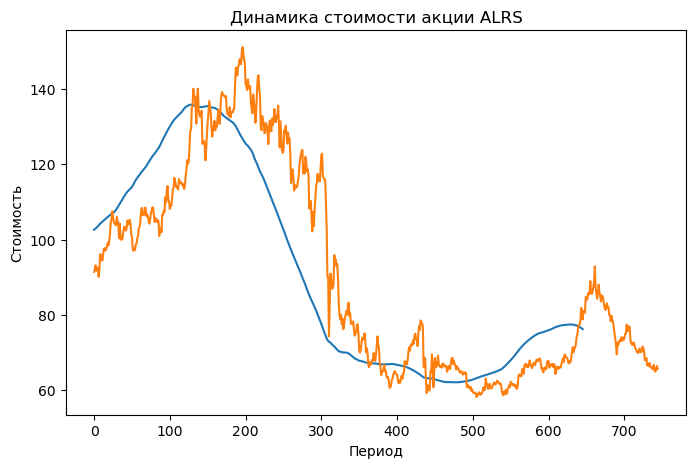

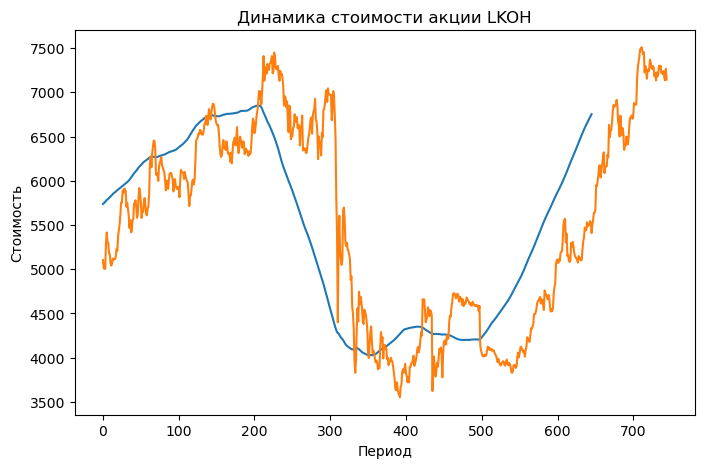

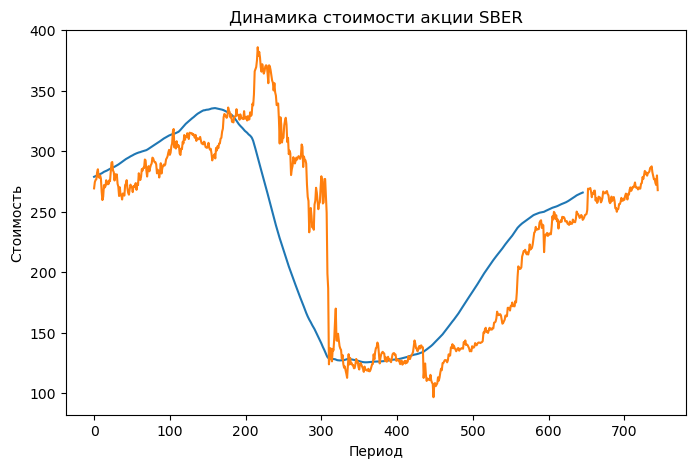

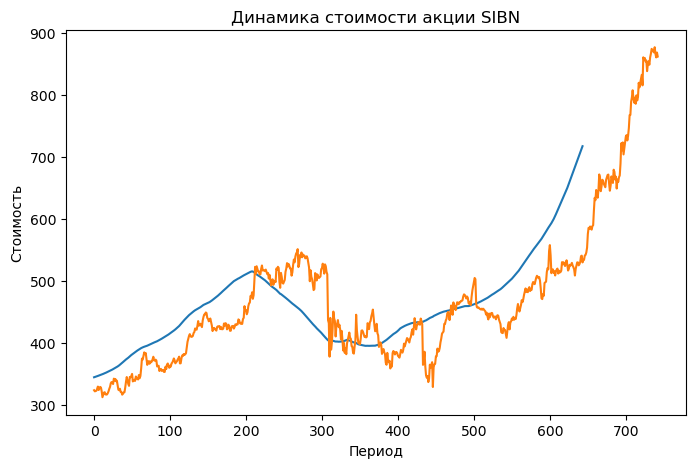

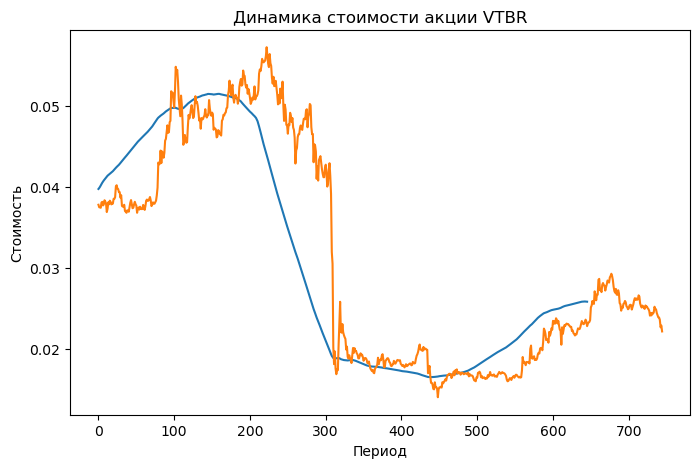

In [23]:
for i in range(len(df['tiker'].unique())):
    plt.figure(figsize=(8, 5))
    plt.plot(list_sr_100[i])
    plt.plot(df[df['tiker'] == (df['tiker'].unique()[i])]['open'].tolist())
    plt.title (f"Динамика стоимости акции {df['tiker'].unique()[i]}")
    plt.xlabel('Период')
    plt.ylabel('Стоимость')

### 7. Постройте в цикле графики объема (volume) для каждого тикера.

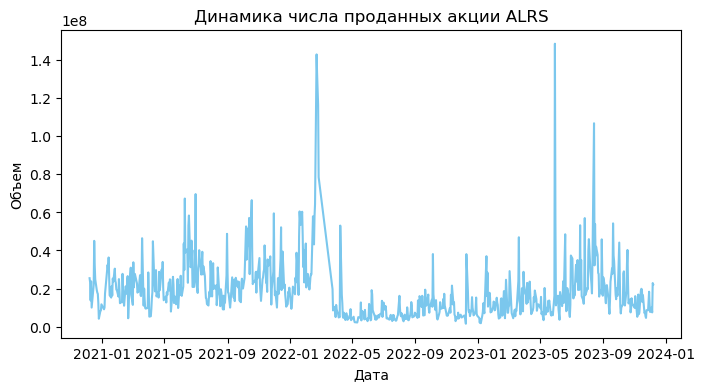

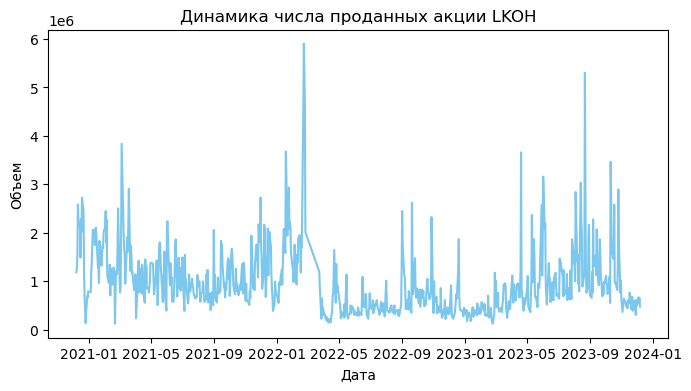

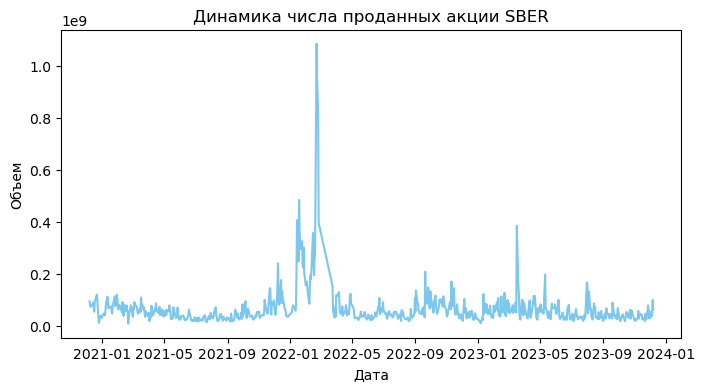

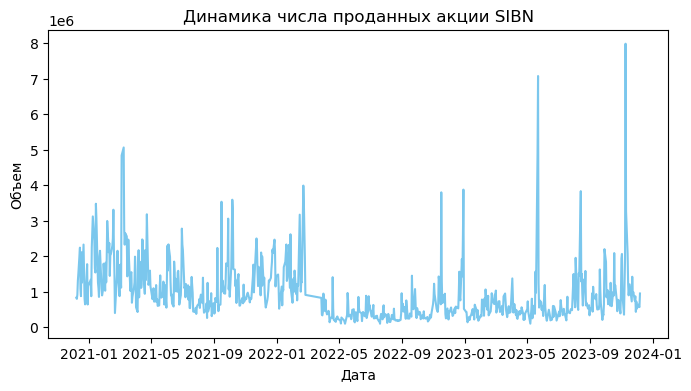

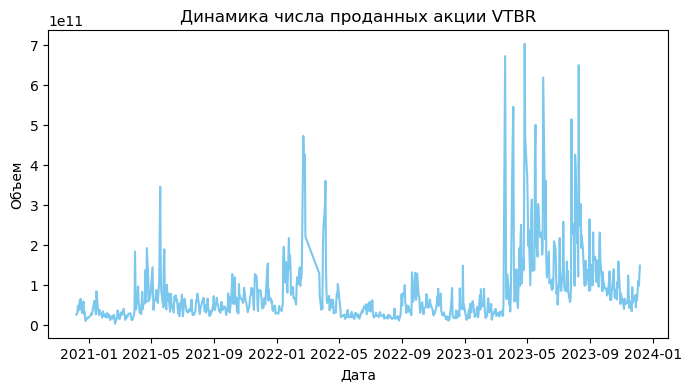

In [24]:
for i in df['tiker'].unique():
    plt.figure(figsize=(8, 4))
    sns.lineplot(data=df[df['tiker'] == i], x='date',y='volume',color = "#7BC7ED").set(title=f'Динамика числа проданных акции {i}', xlabel='Дата', ylabel = 'Объем')
    plt.show()

### 8. Реализуйте в цикле для каждого тикера последовательно: график цены вместе с скользящими средними с периодом 50, 100 и график объема, реализуйте с помощью функции. На вход функция принимает два параметра: тикер и год.

In [25]:
df['year'] = df['date'].dt.year

C:\Users\Админ\AppData\Local\Temp\ipykernel_10412\343203772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


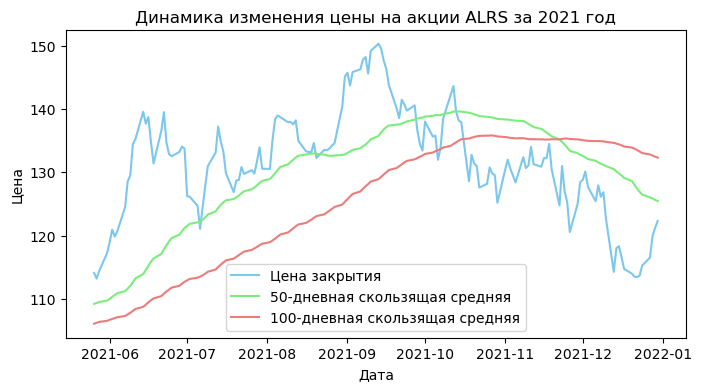

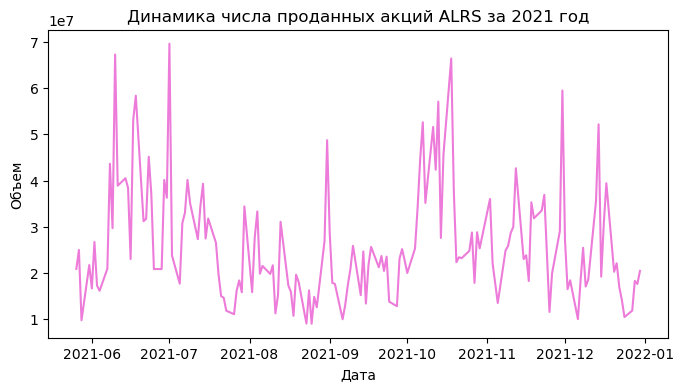

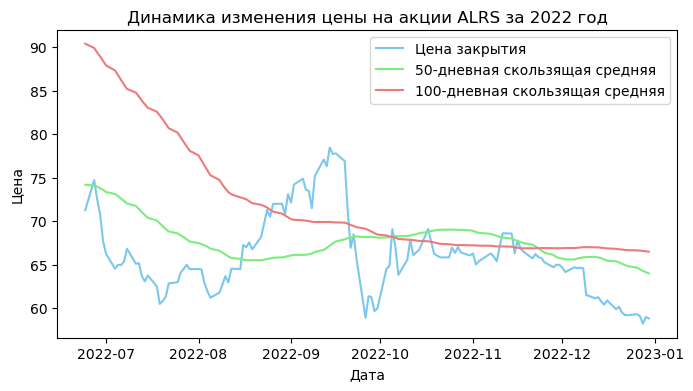

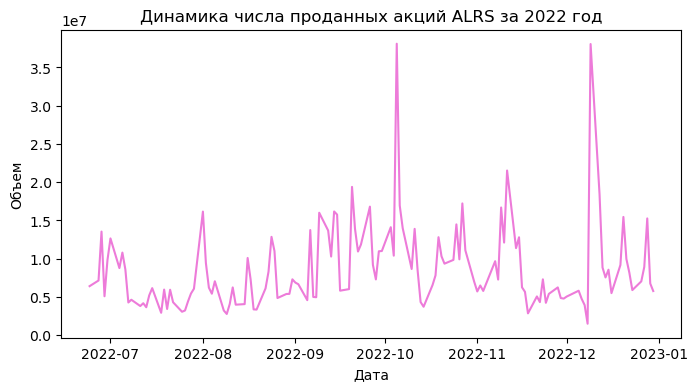

In [26]:
def newfunc(tiker_year):
    for i in range(len(tiker_year)):
        df_new_1 = pd.DataFrame({'close': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['close'].tolist(), 'date': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['date'].astype(str).tolist(),'volume': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['volume'].tolist()}) 
        df_new_1['date'] = pd.to_datetime(df_new_1['date'])
        df_new_1["moving_average_50"] = df_new_1['close'].rolling(window=50).mean()
        df_new_1["moving_average_100"] = df_new_1['close'].rolling(window=100).mean()
        df_new_1 = df_new_1.dropna()
        plt.figure(figsize=(8, 4)) 
        a = sns.lineplot(data=df_new_1, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
        b = sns.lineplot(data=df_new_1, x='date',y='moving_average_50',color = "#7BED7D",label="50-дневная скользящая средняя")
        d = sns.lineplot(data=df_new_1, x='date',y='moving_average_100',color = "#ED7B7B",label="100-дневная скользящая средняя")
        plt.title(f"Динамика изменения цены на акции {tiker_year[i][0]} за {tiker_year[i][1]} год") 
        plt.xlabel("Дата")
        plt.ylabel("Цена")
        plt.show()
        plt.figure(figsize=(8, 4)) 
        c = sns.lineplot(data=df_new_1, x='date',y='volume',color = "#ED7BD9")
        plt.title(f"Динамика числа проданных акций {tiker_year[i][0]} за {tiker_year[i][1]} год") 
        plt.xlabel("Дата")
        plt.ylabel("Объем")
        plt.show()
    
newfunc([('ALRS',2021),('ALRS',2022)])

### 9. Добавьте экспоненциальные скользящие средние для каждого тикера с периодом 50.

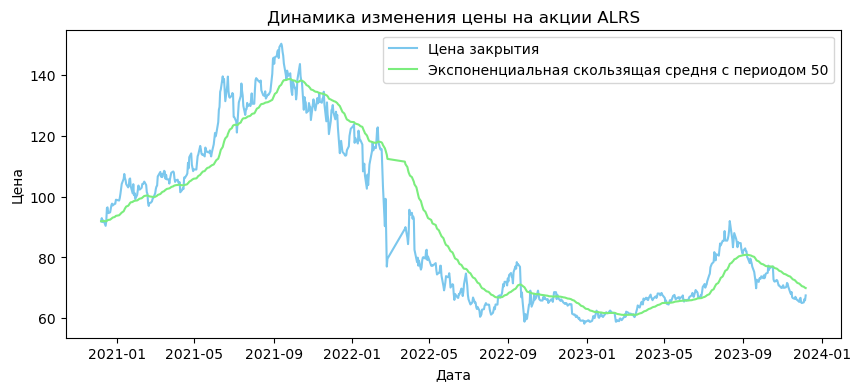

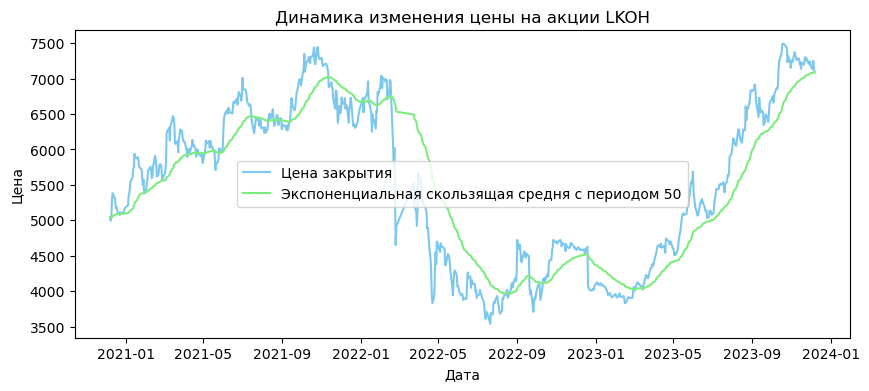

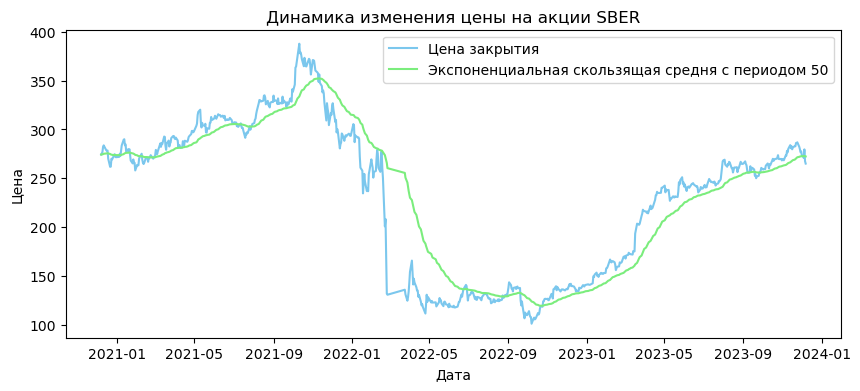

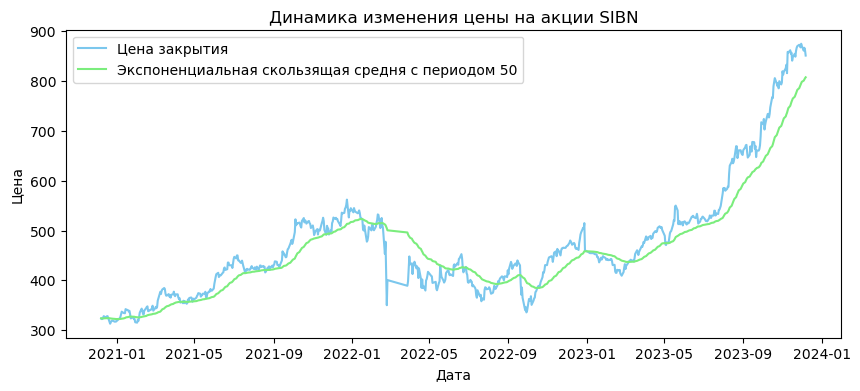

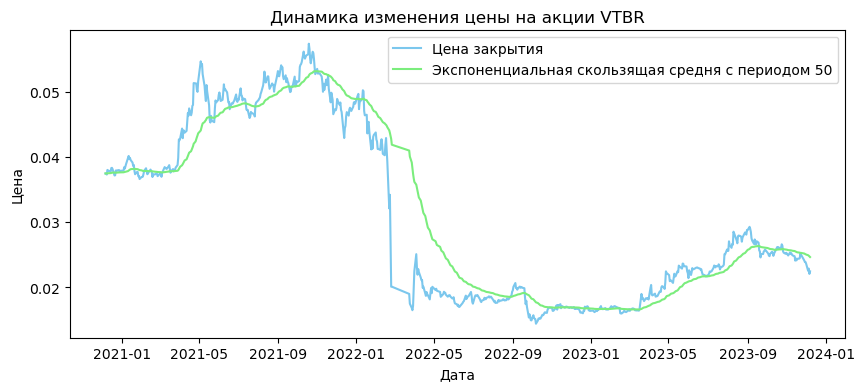

In [27]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new['moving_average_50_exp'] = df_new['close'].ewm(span= 50 , adjust= False ).mean()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(10, 4)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
    b = sns.lineplot(data=df_new, x='date',y='moving_average_50_exp',color = "#7BED7D",label="Экспоненциальная скользящая средня с периодом 50")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a, b)

In [28]:
def rsi(df, periods):
        close_delta = df['close'].diff()
        # Делаем две серий: одну для низких закрытий и одну для высоких закрытий
        up = close_delta.clip(lower=0)
        down = -1 * close_delta.clip(upper=0)
# Использование экспоненциальной скользящей средней
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        rsi = ma_up / ma_down
        rsi = 100 - (100/(1 + rsi))
        return rsi

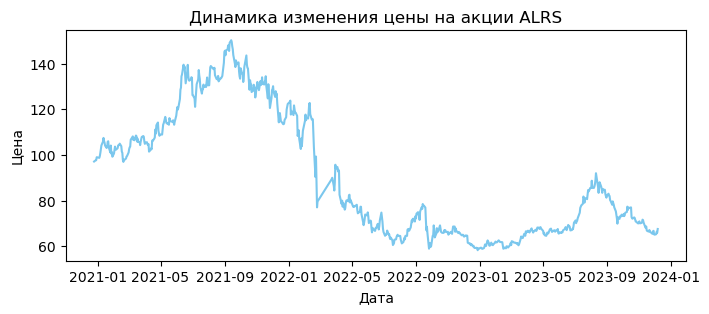

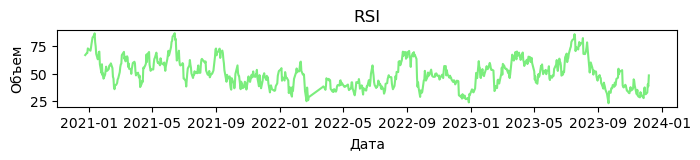

------------------------------------------------------------------------------------------------------------------


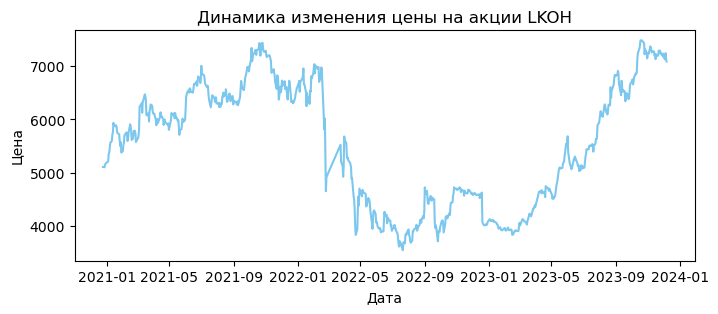

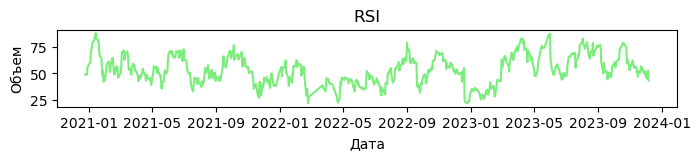

------------------------------------------------------------------------------------------------------------------


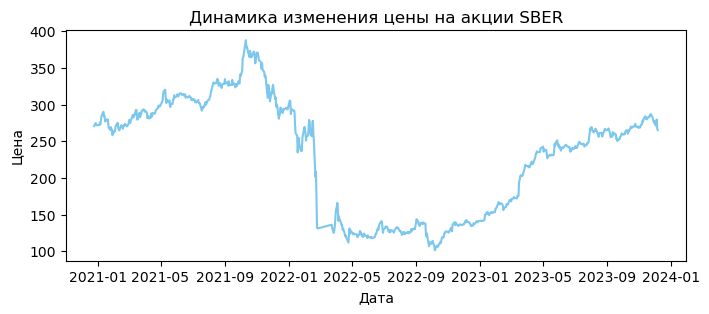

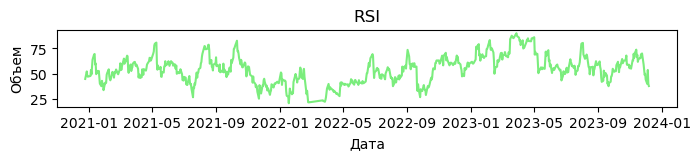

------------------------------------------------------------------------------------------------------------------


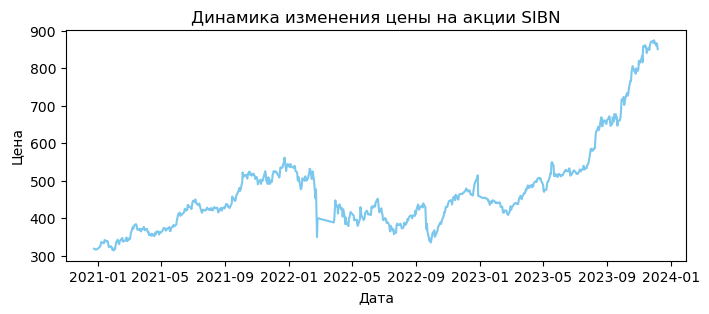

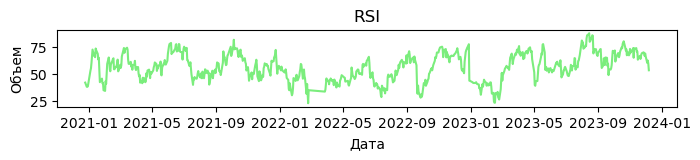

------------------------------------------------------------------------------------------------------------------


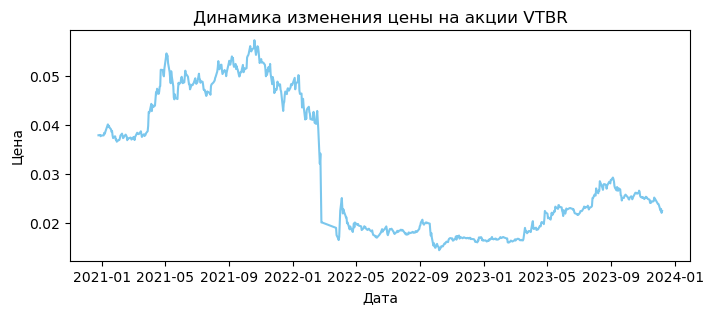

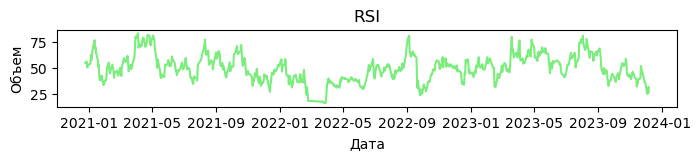

------------------------------------------------------------------------------------------------------------------


In [29]:
for i in df['tiker'].unique().tolist():
    df_new = pd.DataFrame({'close': df[df['tiker'] == i]['close'].tolist(), 'date': df[df['tiker'] == i]['date'].astype(str).tolist()}) 
    df_new['RSI'] = rsi(df_new, 14).tolist()
    df_new= df_new.dropna()
    df_new['date'] = pd.to_datetime(df_new['date'])
    plt.figure(figsize=(8, 3)) 
    a = sns.lineplot(data=df_new, x='date',y='close',color = "#7BC7ED")
    plt.title(f"Динамика изменения цены на акции {i}") 
    plt.xlabel("Дата")
    plt.ylabel("Цена")
    plt.show(a)
    plt.figure(figsize=(8, 1))
    c = sns.lineplot(data=df_new, x='date',y='RSI',color = "#7BED7D")
    plt.title(f"RSI") 
    plt.xlabel("Дата")
    plt.ylabel("Объем")
    plt.show()
    print('------------------------------------------------------------------------------------------------------------------')

11. Создайте функцию для вывода графиков: цены, скользящей средней (тип и период определите самостоятельно) и отдельный график для RSI индикатора. На графике с RSI добавьте две красные линии на уровнях 70 и 30. На вход функция принимает два параметра: тикер и год. 

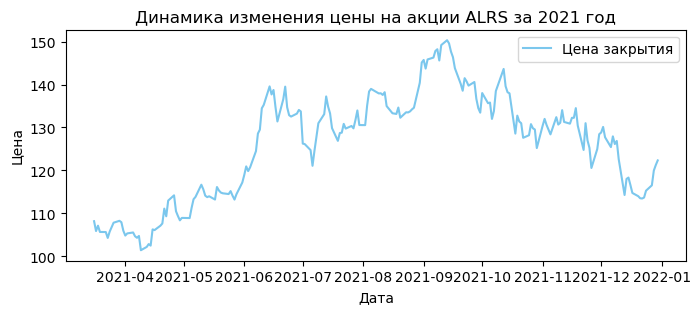

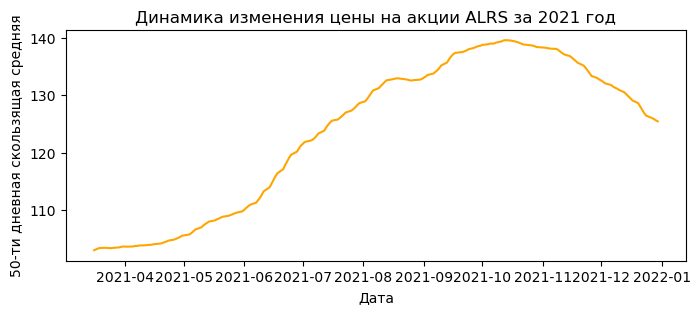

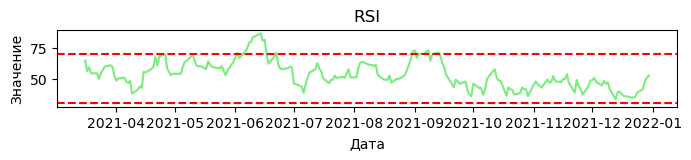

------------------------------------------------------------------------------------------------------------------


In [49]:
def newfunc(tiker_year):
    for i in range(len(tiker_year)):
        df_new_1 = pd.DataFrame({'close': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['close'].tolist(), 'date': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['date'].astype(str).tolist(),'volume': df[(df['tiker'] == tiker_year[i][0])&(df['year']==tiker_year[i][1])]['volume'].tolist()}) 
        df_new_1['date'] = pd.to_datetime(df_new_1['date'])
        df_new_1["moving_average_50"] = df_new_1['close'].rolling(window=50).mean()
        df_new_1['RSI'] = rsi(df_new_1, 14).tolist()
        df_new_1 = df_new_1.dropna()
        plt.figure(figsize=(8, 3)) 
        a = sns.lineplot(data=df_new_1, x='date',y='close',color = "#7BC7ED",label="Цена закрытия")
        plt.title(f"Динамика изменения цены на акции {tiker_year[i][0]} за {tiker_year[i][1]} год") 
        plt.xlabel("Дата")
        plt.ylabel("Цена")
        plt.show()
        plt.figure(figsize=(8, 3))
        b = sns.lineplot(data=df_new_1, x='date',y='moving_average_50',color = "orange")
        plt.title(f"Динамика изменения цены на акции {tiker_year[i][0]} за {tiker_year[i][1]} год") 
        plt.xlabel("Дата")
        plt.ylabel("50-ти дневная скользящая средняя")
        plt.show()
        plt.figure(figsize=(8, 1)) 
        c = sns.lineplot(data=df_new_1, x='date',y='RSI',color = "#7BED7D")
        plt.axhline(y=30, color='r', linestyle='--')
        plt.axhline(y=70, color='r', linestyle='--')
        plt.title(f"RSI") 
        plt.xlabel("Дата")
        plt.ylabel("Значение")
        plt.show(c)
        print('------------------------------------------------------------------------------------------------------------------')
newfunc([('ALRS',2021)])

ПРОГНОЗНАЯ МОДЕЛЬ

In [53]:
df[df['tiker'] == 'ALRS'].corr('kendall')

,open,close,volume,diff,year
open,1.000000,0.937933,0.385249,-0.023815,-0.542375
close,0.937933,1.000000,0.386645,0.038523,-0.540800
volume,0.385249,0.386645,1.000000,0.008343,-0.195074
diff,-0.023815,0.038523,0.008343,1.000000,-0.020665
year,-0.542375,-0.540800,-0.195074,-0.020665,1.000000


In [15]:
!pip install neuralprophet

  Using cached neuralprophet-0.6.2-py3-none-any.whl (137 kB)
  Using cached torchmetrics-0.11.4-py3-none-any.whl (519 kB)
     ---------------------------------------- 5.5/5.5 MB 3.3 MB/s eta 0:00:00
  Using cached matplotlib-3.8.2-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached plotly_resampler-0.8.3.2.tar.gz (46 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
     -------------------------------------- 162.5/162.5 MB 4.2 MB/s eta 0:00:00
  Using cached captum-0.6.0-py3-none-any.whl (1.3 MB)
     ---------------------------------------- 15.6/15.6 MB 4.7 MB/s eta 0:00:00
  Using cached holidays-0.21.13-py3-none-any.whl (378 kB)
  Using cache

ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'c:\\anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.

  ERROR: Can't roll back matplotlib; was not uninstalled
ERROR: Could not install packages due to an OSError: [WinError 32] Процесс не может получить доступ к файлу, так как этот файл занят другим процессом: 'C:\\anaconda\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [16]:
from neuralprophet import NeuralProphet

ModuleNotFoundError: No module named 'neuralprophet'